In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
print(train_data.shape)
train_data.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X=(train_data.iloc[:,1:].values).astype('float32')
y=(train_data.iloc[:,0].values).astype('int32')

In [6]:
X_test=(test_data.values).astype('float32')

In [7]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
X=X.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)


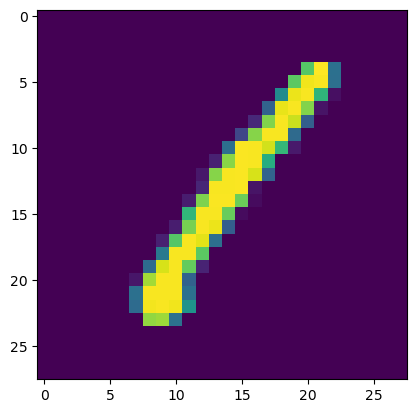

In [9]:
single_image=X[0]
plt.imshow(single_image)

# Preprocessing

In [10]:
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
y_train.shape

(28140,)

In [13]:
y_test

array([8, 1, 9, ..., 6, 3, 2], dtype=int32)

In [14]:
from tensorflow.keras.utils import to_categorical

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [15]:
y_example=to_categorical(y_train)

In [16]:
y_example.shape

(28140, 10)

In [17]:
y_example[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [18]:
y_cat_test=to_categorical(y_test,10)
y_cat_train=to_categorical(y_train,10)

# Processing X data


In [19]:
print(single_image.max())
print(single_image.min())

255.0
0.0


In [20]:
X_train/=255

In [21]:
X_test/=255

In [22]:
scaled_single=X_train[0]
scaled_single.max()

1.0

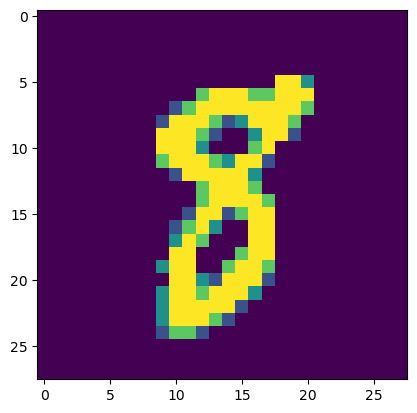

In [23]:
plt.imshow(scaled_single)

# Reshaping the data

In [24]:
X_train.shape

(28140, 28, 28, 1)

In [25]:
X_test.shape

(13860, 28, 28, 1)

The dataset has the right shapes so we need'nt change any

# Training the model now

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [61]:
model=Sequential()

#Adding convolutional layer

model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1, 1), padding='Same', input_shape=(28, 28, 1), activation='relu'))

model.add(Conv2D(filters=32,kernel_size=(5,5),strides=(1, 1),padding='Same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))



model.add(Conv2D(filters=64,kernel_size=(5,5),strides=(1, 1),padding='Same',input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(5,5),strides=(1, 1),padding='Same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(10, activation='softmax'))



In [66]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 64)        102464    
                                                      

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
early_stop=EarlyStopping(  monitor='val_loss',patience=20)

In [69]:
model.fit(X_train,y_cat_train,epochs=300,validation_data=(X_test,y_cat_test),callbacks=[early_stop],batch_size=512)

Epoch 1/300


2023-08-23 22:06:58.096722: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_11/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


55/55 [==============================] - 8s 80ms/step - loss: 0.5996 - accuracy: 0.8029 - val_loss: 0.1043 - val_accuracy: 0.9683
Epoch 2/300
55/55 [==============================] - 3s 54ms/step - loss: 0.1219 - accuracy: 0.9627 - val_loss: 0.0592 - val_accuracy: 0.9817
Epoch 3/300
55/55 [==============================] - 3s 49ms/step - loss: 0.0803 - accuracy: 0.9760 - val_loss: 0.0540 - val_accuracy: 0.9835
Epoch 4/300
55/55 [==============================] - 3s 54ms/step - loss: 0.0629 - accuracy: 0.9808 - val_loss: 0.0539 - val_accuracy: 0.9842
Epoch 5/300
55/55 [==============================] - 3s 54ms/step - loss: 0.0508 - accuracy: 0.9841 - val_loss: 0.0355 - val_accuracy: 0.9890
Epoch 6/300
55/55 [==============================] - 3s 56ms/step - loss: 0.0426 - accuracy: 0.9865 - val_loss: 0.0360 - val_accuracy: 0.9890
Epoch 7/300
55/55 [==============================] - 3s 54ms/step - loss: 0.0396 - accuracy: 0.9876 - val_loss: 0.0330 - val_accuracy: 0.9900
Epoch 8/300
55/55 

In [35]:
model.metrics_names

['loss', 'accuracy']

In [70]:
losses = pd.DataFrame(model.history.history)

In [71]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.599639,0.802878,0.104261,0.968326
1,0.121933,0.962687,0.059176,0.981746
2,0.080329,0.976048,0.054035,0.983478
3,0.062851,0.980846,0.053930,0.984199
4,0.050778,0.984115,0.035532,0.988961


<Axes: >

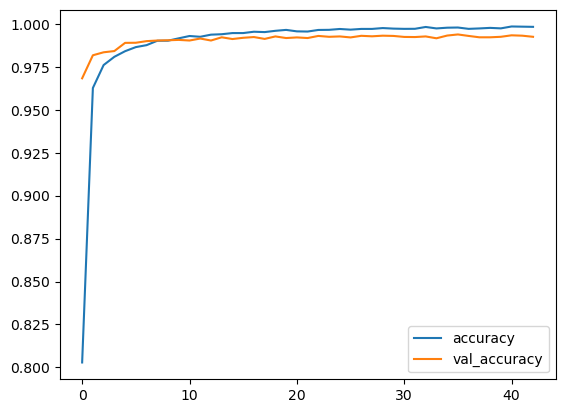

In [72]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

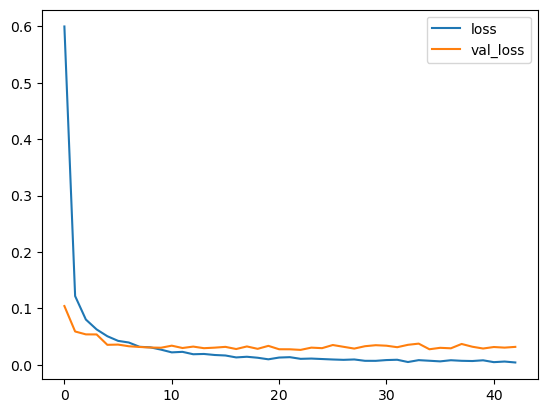

In [73]:
losses[['loss','val_loss']].plot()

In [74]:
print(model.metrics_names)
print(model.evaluate(X_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.03189127519726753, 0.9924963712692261]


In [76]:
from sklearn.metrics import classification_report,confusion_matrix

In [86]:
predictions=model.predict(X_test)
# Get the predicted class labels
predicted_classes = np.argmax(predictions, axis=-1)

434/434 [==============================] - 1s 2ms/step


In [81]:
X_test.shape

(13860, 28, 28, 1)

In [82]:
y_cat_test.shape

(13860, 10)

In [87]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [90]:
predicted_classes[0]

8

In [91]:
y_test

array([8, 1, 9, ..., 6, 3, 2], dtype=int32)

In [92]:
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1333
           1       1.00      0.99      1.00      1520
           2       0.99      1.00      0.99      1414
           3       1.00      0.99      0.99      1471
           4       0.99      0.99      0.99      1358
           5       0.99      1.00      0.99      1205
           6       0.99      0.99      0.99      1397
           7       0.99      0.99      0.99      1480
           8       0.99      0.99      0.99      1334
           9       0.99      0.99      0.99      1348

    accuracy                           0.99     13860
   macro avg       0.99      0.99      0.99     13860
weighted avg       0.99      0.99      0.99     13860



In [93]:
print(confusion_matrix(y_test,predicted_classes))

[[1328    0    0    0    0    1    2    0    1    1]
 [   0 1511    1    0    0    0    1    6    1    0]
 [   1    1 1407    1    1    0    0    2    1    0]
 [   1    0    1 1459    0    4    0    0    6    0]
 [   0    0    2    0 1346    0    1    1    1    7]
 [   0    0    0    1    0 1201    2    0    1    0]
 [   2    1    1    0    3    2 1385    0    3    0]
 [   0    2    6    0    2    0    0 1467    1    2]
 [   0    0    3    2    1    3    1    0 1322    2]
 [   3    1    0    2    2    3    0    4    3 1330]]


In [95]:
results = pd.Series(predicted_classes,name="Label")

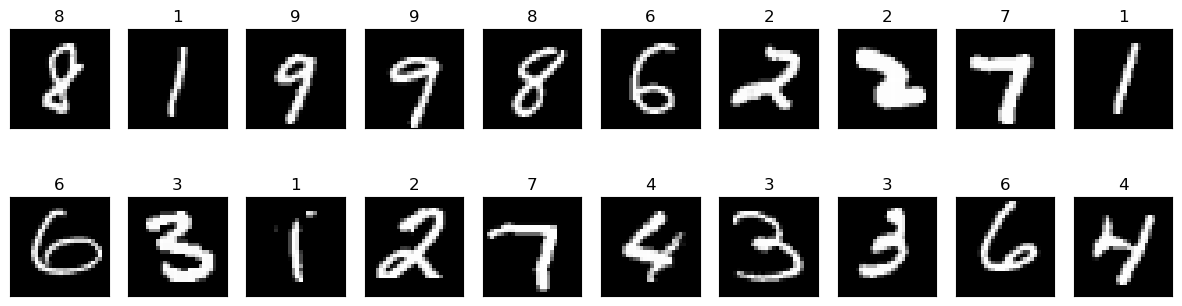

In [96]:
# Figure size
plt.figure(figsize=(15,4))

# Subplot 
for i in range(20):
    ax=plt.subplot(2, 10, i+1)
    ax.grid(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(X_test[i], cmap=plt.get_cmap('gray'))
    plt.title(results[i]);
    
plt.show()

In [97]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)

In [98]:
import os
print(os.listdir())


['.virtual_documents', 'submission.csv']
